# DevIncept

## All Techniques For Missing Value Imputation

### Data Imputation
Data Imputation is an act of replacing the missing data with some statistical measures of missing values.
Datasets may have missing values and this cause problem to many Machine learning algorithms

**The treatment of missing values is necessary for following reasons:-**
- Missing value affects the distribution of data
- Missing value affects the complexity and accuracy of machine learning model
- Without treating Missing values we cannot perform the mathematical computation on data

As such, It's good practice to identify and replace the missing values prior to modelling and prediction task to avoid such parameters to occur during your Machine Learning journey. So, let's deep dive and learn all the techniques which can be used in different cases to treat missing values.


## Missing Data Imputation Techniques
We’re going to dive into techniques that apply to numerical and categorical variables, and also I will tell the techniques which are applied on both and when to use which technique with benifits and limitations.

The dataset I am going is use is Titanic Dataset which you can easily found on Kaggle or download from <a><link rel="stylesheet" href="https://www.kaggle.com/c/titanic/data" target="_blank">here</a>

**Numerical**
* Mean, Median imputation
* Arbitrary Value Imputaion
* End of Distribution

**Categorical**
* Frequent category imputaion
* Add a missing category

**Both**
* Random Sampling Imputation
* Add a Missing Indicator
* Complete Case Analysis

In [1]:
# first import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load datset
data = pd.read_csv('datasets/Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# finding missing values
data.isnull().sum()  #or data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Here Age is a numeric column so we will take this column to perform missing value imputaion techniques for numeric variable 

## 1) Mean, Median Imputation
Mean or Median Imputation consist of replacing the missing values with statistical mean or median of variable
- if the variable follows the normal distribution then mean and median is normally the same
- if there is skewed data then, it's better to use median or for using mean you should transform the variable first into normal form.

you can use this technique when data is missing completly at random and percentage of missing data is less then 5%

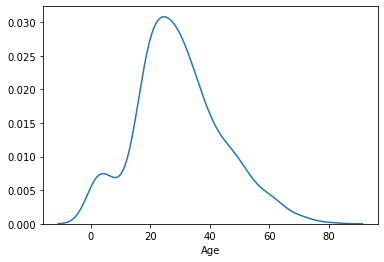

In [4]:
# let's see the distribution of AGE variable
sns.distplot(data['Age'], hist=False)
plt.show()

In [5]:
# here we have Age as approximate normally distributed.
median = data['Age'].median()
median

28.0

In [6]:
#fill the missing values
data['Age_median'] = data['Age'].fillna(median)

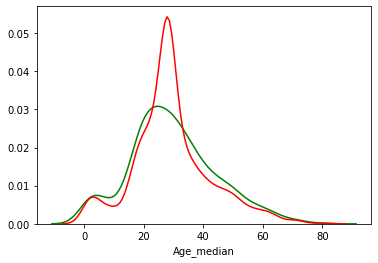

In [7]:
# let's compare the shape
sns.distplot(data['Age'], hist=False, color='green')
sns.distplot(data['Age_median'], hist=False, color='red')
plt.show()

* the shape is infront of us and it's completly normally distributed.

**ADVANTAGES**
* Easy to impliment
* fast way of obtaining complete dataset
* canbe used in production

**DISADVANTAGES**
* It distorts the distribution and variance of original variable
* distorts the covariance with remaining dataset variable

## 2) Arbitrary Value Imputation
Arbitrary Value Imputation consist of replacing the NULL value manually towards the edge lower or upper means the arbitrary value should be different from mean or median and not within the normal values of variable

we can use arbitrary value as 0,99,100 or -1 in case of positive distribution

In [8]:
data['Age'+'Zeros'] = data['Age'].fillna(0)
#or
data['Age'+'Hund'] = data['Age'].fillna(100)

**ADVANTAGES**
* Easy to impliment
* captures the importance of missing values

**DISADVANTAGES**
* It distorts the distribution of original variable
* higher the percentage of NA, higher is distortion
* if arbitary value is choosen to far then it may create outliers

## 3) End of Distribution
Most of the observations (~99%) of a normally-distributed variable lie within the mean plus/minus three times standard deviations—for that the `selected value = mean ± 3 ×standard deviations.`

Skewed distributions The general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows: IQR = 75th Quantile –25th Quantile.

`Upper limit = 75th Quantile + IQR ×3.
 Lower limit = 25th Quantile - IQR ×3.`

So the selected value for imputation is the previously calculated upper limit or the lower limit.

In [9]:
# in case of age we have more values under 3rd std so we can use extreme IQR
extreme = data['Age'].mean() + 3*data['Age'].std() 
print(extreme)

data['Age'+'_end'] = data['Age'].fillna(extreme)

73.27860964406094


In [10]:
IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
print(IQR)
upper = data['Age'].quantile(0.75) + IQR * 3
lower = data['Age'].quantile(0.25) - IQR * 3
print("upper limit: ",upper)
print("lower limit: ",lower)

17.875
upper limit:  91.625
lower limit:  -33.5


**ADVANTAGES**
* Provide importance to missing data as it segregate them out from the meaningful data
* It can be used in Production.

**DISADVANTAGES**
* It distorts the distribution of original variable

## 4) Frequent Category Imputation
Frequent category imputaion or **mode imputaion** consist of replacing the missing values with the most occuring value in data

This method is suitable for Numerical and Categorical both but practically it's mostly used for categorical variables 

In [11]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print("len of categorical features: ",len(categorical_features))

len of categorical features:  5


In [12]:
data[categorical_features].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [13]:
#data['Embarked'].value_counts()
data['Embarked'].mode()[0]

'S'

In [14]:
def impute_freq_cat(df,variable):
    freq_cat = df[variable].value_counts().index[0]
    df[variable].fillna(freq_cat,inplace=True)
    
impute_freq_cat(data,'Embarked')

**ADVANTAGES**
* easy to impliment
* can be used in production

**DISADVANTAGES**
* Distorts the relation of most frequent label with other values
* if there is more missing value, then it may lead to over-representation of frequent lebel.

## 5) Missing Category Imputaion
Missing category imputation refers to adding a additional(new) category label to missing data like Unknown, None, Missing or any. Thus, we create a new label or category by filling the missing observations with a Missing category.

The technique is most widely used method for imputing missing values in categorical variables

In [15]:
data['Cabin'] = data['Cabin'].fillna("Missing")

**ADVANTAGE**
* The technique helps to capture and give the importance to Missing values
* Easy to impliment
* No assumptions is made on data

**DISADVANTAGES**
* there is not any kind of change or increase in corelation because importance is provided to Missing values and we want in respect to target variable
* If there is small amount of missing values then adding a new category is like, just adding a rare label to data

## 6) Random Sample Imputation
Random Sample Imputation consist of taking random observation from pool of available data and replace it in place of missing fields
**The method is suitable for Numerical as well Categorical Variable**

In [16]:
data.Age.sample()
# everytime we run it we get a random value

355    28.0
Name: Age, dtype: float64

In [17]:
#function for random sample imputation
def imputeNan(df,variable):
    df[variable+'_random'] = df[variable]
    random_sample = df['Age'].dropna().sample(df[variable].isna().sum(), random_state=1)
    
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample
    
imputeNan(data,'Age')

**ADVANTAGES**
* It preserves the variance of variable
* It can be used in production

**DISADVANTAGES**
* If there are lot of missing values then, relationship may get distorted between imputed variable and target variable
* Memory is massive for deployment, as we need to store the original training set to extract values from, and replace the missing values with the randomly selected values.

## 7) Add a Missing Indicator to NAN
A missing Indicator is an additional binary variable that indicate whether the data is missing for an observation 1 or not 0. The goal here is to capture observations where data is missing.

The method is used when data is missing completly at random

The method is suitable for bot Numerical and categorcal variable

In [18]:
data['Cabin_Nan'] = np.where(data['Cabin'].isnull(),1,0)

wherever data is missing it will highlight with 1 and other with 0.
**ADVANTAGES**
* Easy to impliment
* Provide importance to missing data
* can be used in production

**DISADVANTAGES**
* many missing indicator may end up being identical or very highly corelated.

## Complete Case Analysis
The method is very simple and consist of simply discarding the missing values if available in any variable. In CCA we only keed the information that are available to us, except that all the values are excluded from dataset.

The method is used for Numerical and Categorical data

In [19]:
data.dropna(inplace=True)

**ADVANTAGES**
* No data manipulation is required
* easy to impliment
* Preserve the distribution of data

**DISADVANTAGES**
* It can exclude significant fraction of original dataset(If missing data is significant)
* When using this method in production, the model can’t know how to handle missing data.
* CCA can create a biased dataset if the complete cases differ from the original data.

**We have explored multiple methods for handling missing data with their advantages and limitation of each technique.I hope now we are capable to handle the different situation of missing data. what's left is to try these methods on your dataset.**

# Thank You!